In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def create_dataframe(matrix, tokens):

    doc_names = [f'doc_{i}' for i, _ in enumerate(matrix)]
    df = pd.DataFrame(data=matrix, index=doc_names, columns=tokens)
    return(df)

In [3]:
# Пример текстовых данных
documents = [
    "Машинное обучение - то интересная область.",
    "то интересная область. Машинное обучение - ",
    "Глубокое Машинное обучение - это интересная область.",
    "Машинное обучение - это очень интересная область.",
    "Машинное обучение - это неинтересная область."
]

In [4]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)
feature_names = tfidf_vectorizer.get_feature_names_out()
dense = tfidf_matrix.todense()
denselist = dense.tolist()

df = pd.DataFrame(denselist, columns = feature_names)
df

,глубокое,интересная,машинное,неинтересная,область,обучение,очень,то,это
0,0.000000,0.438661,0.371016,0.000000,0.371016,0.371016,0.000000,0.628186,0.000000
1,0.000000,0.438661,0.371016,0.000000,0.371016,0.371016,0.000000,0.628186,0.000000
2,0.639257,0.360146,0.304609,0.000000,0.304609,0.304609,0.000000,0.000000,0.428118
3,0.000000,0.360146,0.304609,0.000000,0.304609,0.304609,0.639257,0.000000,0.428118
4,0.000000,0.000000,0.326520,0.685239,0.326520,0.326520,0.000000,0.000000,0.458913


In [5]:
cosine_similarity_matrix  = cosine_similarity(tfidf_matrix)
create_dataframe(tfidf_matrix.toarray(), feature_names)

,глубокое,интересная,машинное,неинтересная,область,обучение,очень,то,это
doc_0,0.000000,0.438661,0.371016,0.000000,0.371016,0.371016,0.000000,0.628186,0.000000
doc_1,0.000000,0.438661,0.371016,0.000000,0.371016,0.371016,0.000000,0.628186,0.000000
doc_2,0.639257,0.360146,0.304609,0.000000,0.304609,0.304609,0.000000,0.000000,0.428118
doc_3,0.000000,0.360146,0.304609,0.000000,0.304609,0.304609,0.639257,0.000000,0.428118
doc_4,0.000000,0.000000,0.326520,0.685239,0.326520,0.326520,0.000000,0.000000,0.458913


<Axes: >

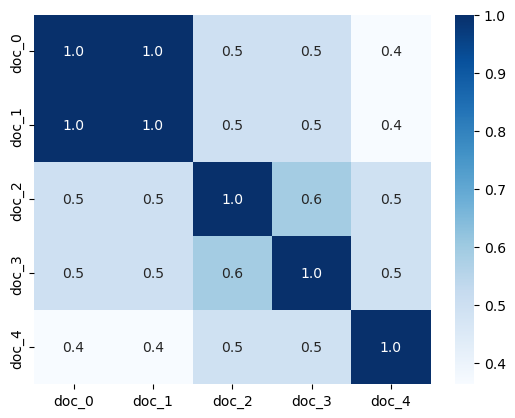

In [6]:
doc_names_list = [f'doc_{i}' for i, _ in enumerate(cosine_similarity_matrix)]
dataframe_hm = create_dataframe(cosine_similarity_matrix, doc_names_list)
#plt.figure(figsize = (24,16))
sns.heatmap(dataframe_hm, cmap="Blues", annot=True, fmt=".1f") 
#, annot= True,fmt=".1f"

In [7]:
# Сортировка слов по значениям TF-IDF
sorted_keywords = [word for _, word in sorted(zip(tfidf_scores, feature_names), reverse=True)]

print("Ключевые слова:", sorted_keywords[:10])

NameError: name 'tfidf_scores' is not defined

In [ ]:
feature_names

array(['глубокое', 'интересная', 'машинное', 'неинтересная', 'область',
       'обучение', 'очень', 'то', 'это'], dtype=object)

In [ ]:
tfidf_scores

array([0.30151134, 0.30151134, 0.        , 0.        , 0.30151134,
       0.30151134, 0.30151134, 0.30151134, 0.        , 0.        ,
       0.30151134, 0.30151134, 0.        , 0.        , 0.        ,
       0.30151134, 0.        , 0.        , 0.30151134, 0.30151134])

In [ ]:
tfidf_matrix.toarray()

array([[0.        , 0.43866078, 0.37101648, 0.        , 0.37101648,
        0.37101648, 0.        , 0.62818551, 0.        ],
       [0.        , 0.43866078, 0.37101648, 0.        , 0.37101648,
        0.37101648, 0.        , 0.62818551, 0.        ],
       [0.63925688, 0.36014618, 0.30460933, 0.        , 0.30460933,
        0.30460933, 0.        , 0.        , 0.42811778],
       [0.        , 0.36014618, 0.30460933, 0.        , 0.30460933,
        0.30460933, 0.63925688, 0.        , 0.42811778],
       [0.        , 0.        , 0.32652018, 0.68523926, 0.32652018,
        0.32652018, 0.        , 0.        , 0.45891272]])

In [ ]:
df = pd.DataFrame({'docId': [1,2,3], 
               'sent': ['This is the first sentence','This is the second sentence', 'This is the third sentence']})

In [ ]:
df

,docId,sent
0,1,This is the first sentence
1,2,This is the second sentence
2,3,This is the third sentence


In [ ]:
v = TfidfVectorizer()
x = v.fit_transform(df['sent'])
x.toarray()

array([[0.64612892, 0.38161415, 0.        , 0.38161415, 0.38161415,
        0.        , 0.38161415],
       [0.        , 0.38161415, 0.64612892, 0.38161415, 0.38161415,
        0.        , 0.38161415],
       [0.        , 0.38161415, 0.        , 0.38161415, 0.38161415,
        0.64612892, 0.38161415]])

In [ ]:
v.get_feature_names()

c:\Users\seismopro\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['first', 'is', 'second', 'sentence', 'the', 'third', 'this']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Пример текстовых данных
documents = [
    "Искусственный интеллект становится все более распространенным.",
    "Интеллектуальные системы обладают большим потенциалом."
]

# Создание объекта TfidfVectorizer с использованием биграмм
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))

# Применение TF-IDF к текстовым данным
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# Получение списка фичей и их значения TF-IDF для первого документа
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.toarray()[0]

# Сортировка фичей по значениям TF-IDF
sorted_features = [feature for _, feature in sorted(zip(tfidf_scores, feature_names), reverse=True)]

print("Важные фичи:", sorted_features)

Важные фичи: ['становится все', 'становится', 'распространенным', 'искусственный интеллект', 'искусственный', 'интеллект становится', 'интеллект', 'все более', 'все', 'более распространенным', 'более', 'системы обладают', 'системы', 'потенциалом', 'обладают большим', 'обладают', 'интеллектуальные системы', 'интеллектуальные', 'большим потенциалом', 'большим']
